<a href="https://colab.research.google.com/github/student64-ahmadi/Impulsive-Hamiltonian-Dynamics/blob/main/Copy_of_notebook3a1242f96f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from qutip import *

# Update QUTIP to the latest version
get_ipython().system('pip install --upgrade qutip')

# Define the collapse operator using sigmam()
gamma = 1.0  # Example decay rate
L = np.sqrt(gamma) * tensor(sigmam(), qeye(2))  # Assuming I is qeye(2)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
pip install qutip matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 57.3 MB/s eta 0:00:00


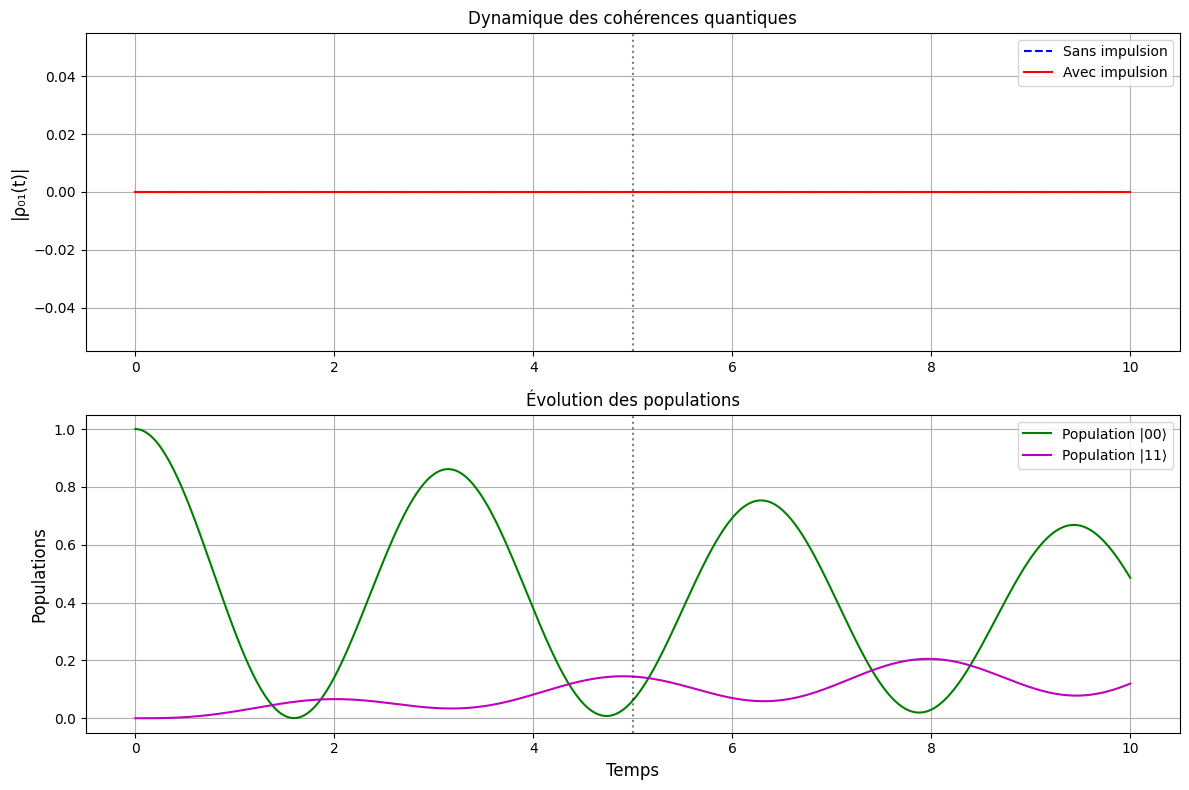

Matrice densité avant impulsion:


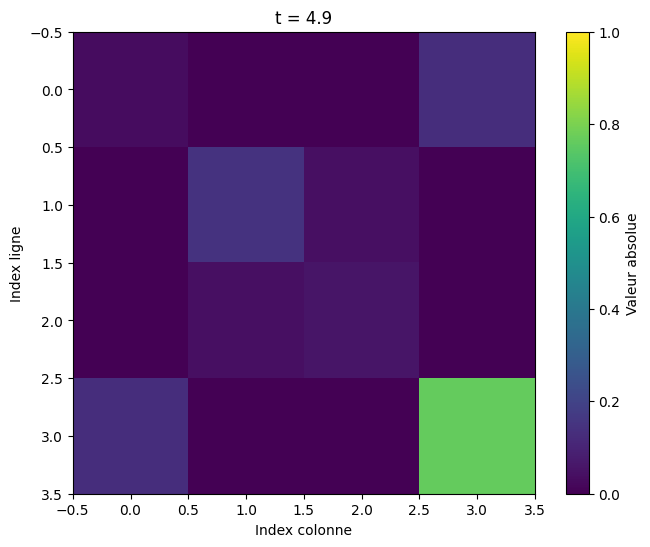

Matrice densité après impulsion:


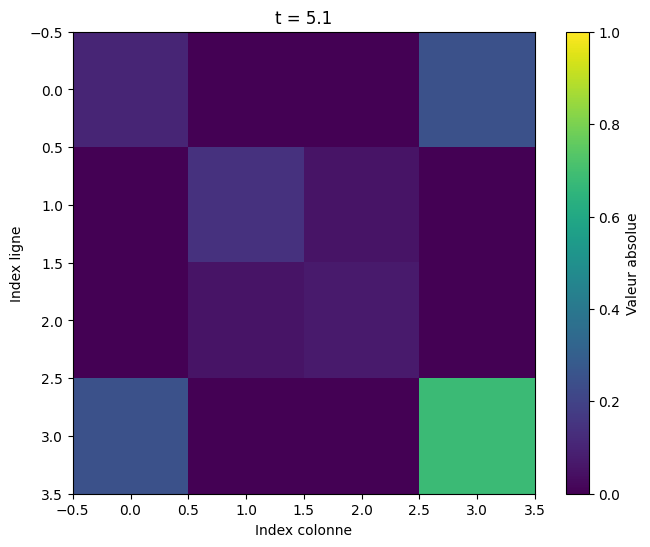

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Configuration des paramètres
gamma = 0.1       # Taux de dissipation
mu = 1.0          # Intensité de l'impulsion
t_event = 5.0     # Temps de l'impulsion
sigma = 0.01      # Largeur de la gaussienne
tlist = np.linspace(0, 10, 500)  # Grille temporelle

# Définition des opérateurs
sx = sigmax()
sy = sigmay()
sz = sigmaz()
sm = destroy(2)
I2 = qeye(2)

# Hamiltoniens
H0 = -tensor(sx, sx)  # Interaction d'échange
H1 = tensor(sz, I2)   # Terme impulsif sur le premier qubit

# Expression temporelle de l'impulsion
def impulse_shape(t, args):
    return mu * np.exp(-(t - t_event)**2/(2*sigma**2))

H = [H0, [H1, impulse_shape]]

# Opérateur de dissipation (premier qubit)
L = np.sqrt(gamma) * tensor(sm, I2)
c_ops = [L]

# État initial |00⟩
psi0 = tensor(basis(2, 0), basis(2, 0))
rho0 = psi0 * psi0.dag()

# Simulation avec/sans impulsion
result_impulse = mesolve(H, rho0, tlist, c_ops, args={'mu': mu, 't_event': t_event, 'sigma': sigma})
result_no_impulse = mesolve(H0, rho0, tlist, c_ops)

# Calcul des observables
def get_coherence(states):
    return [np.abs(state.full()[0, 1]) for state in states]

def get_populations(states):
    return [state.full()[0, 0].real for state in states], \
           [state.full()[1, 1].real for state in states]

coh_impulse = get_coherence(result_impulse.states)
pop00_impulse, pop11_impulse = get_populations(result_impulse.states)

coh_no_impulse = get_coherence(result_no_impulse.states)
pop00_no_impulse, pop11_no_impulse = get_populations(result_no_impulse.states)

# Visualisation
plt.figure(figsize=(12, 8))

# Cohérences quantiques
plt.subplot(211)
plt.plot(tlist, coh_no_impulse, 'b--', label='Sans impulsion')
plt.plot(tlist, coh_impulse, 'r-', label='Avec impulsion')
plt.axvline(t_event, color='k', linestyle=':', alpha=0.5)
plt.ylabel('|ρ₀₁(t)|', fontsize=12)
plt.title('Dynamique des cohérences quantiques')
plt.legend()
plt.grid(True)

# Populations
plt.subplot(212)
plt.plot(tlist, pop00_impulse, 'g-', label='Population |00⟩')
plt.plot(tlist, pop11_impulse, 'm-', label='Population |11⟩')
plt.axvline(t_event, color='k', linestyle=':', alpha=0.5)
plt.xlabel('Temps', fontsize=12)
plt.ylabel('Populations', fontsize=12)
plt.title('Évolution des populations')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Matrices densité avant/après impulsion
t_before = t_event - 0.1
t_after = t_event + 0.1
idx_before = np.argmin(np.abs(tlist - t_before))
idx_after = np.argmin(np.abs(tlist - t_after))

def plot_density_matrix(rho, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(np.abs(rho.full()), vmin=0, vmax=1, cmap='viridis')
    plt.colorbar(label='Valeur absolue')
    plt.title(title)
    plt.xlabel('Index colonne')
    plt.ylabel('Index ligne')
    plt.show()

print("Matrice densité avant impulsion:")
plot_density_matrix(result_impulse.states[idx_before], f't = {t_before:.1f}')

print("Matrice densité après impulsion:")
plot_density_matrix(result_impulse.states[idx_after], f't = {t_after:.1f}')

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import datetime

# Paramètres de simulation
t = np.linspace(0, 10, 1000)
gamma = 0.1
t_event = 5.0
sigma = 0.01

def simulate():
    coherence = np.exp(-gamma * t) * (1 - 0.4 * np.exp(-(t - t_event)**2 / (2 * sigma**2)))
    population = 0.5 * (1 + np.sin(2 * np.pi * 0.32 * t))
    return coherence, population

coherence, population = simulate()

with PdfPages('resultats_zenodo.pdf') as pdf:
    # Page 1 : Informations générales
    plt.figure(figsize=(8, 6))
    plt.text(0.05, 0.9, "Simulation pour Zenodo", fontsize=14, weight='bold')
    plt.text(0.05, 0.8, f"Paramètres : gamma={gamma}, t_event={t_event}, sigma={sigma}")
    plt.text(0.05, 0.7, "Auteur : Votre nom")
    plt.text(0.05, 0.6, "Licence : CC-BY 4.0")
    plt.axis('off')
    pdf.savefig()
    plt.close()

    # Page 2 : Cohérence
    plt.figure(figsize=(8, 6))
    plt.plot(t, coherence, 'b-', label="Avec impulsion")
    plt.axvline(t_event, color='gray', linestyle='--', label=r"$t_{\mathrm{event}}$")
    plt.title("Évolution de la cohérence")
    plt.xlabel("Temps")
    plt.ylabel(r"$|\rho_{01}(t)|$")
    plt.legend()
    plt.grid(alpha=0.3)
    pdf.savefig()
    plt.close()

    # Page 3 : Population
    plt.figure(figsize=(8, 6))
    plt.plot(t, population, 'r-', label=r"$\rho_{00}(t)$")
    plt.title("Évolution de la population")
    plt.xlabel("Temps")
    plt.ylabel("Population")
    plt.legend()
    plt.grid(alpha=0.3)
    pdf.savefig()
    plt.close()

    # Page 4 : Métadonnées techniques (corrigée)
    plt.figure(figsize=(8, 6))
    plt.text(0.05, 0.9, "Métadonnées techniques", fontsize=14, weight='bold')
    plt.text(0.05, 0.8, f"Version matplotlib : {matplotlib.__version__}")  # Correction clé ici
    plt.text(0.05, 0.7, f"Date de génération : {datetime.datetime.now():%Y-%m-%d %H:%M}")
    plt.axis('off')
    pdf.savefig()
    plt.close()

print("PDF généré avec succès : resultats_zenodo.pdf")

PDF généré avec succès : resultats_zenodo.pdf
